Vista general del dataset:
          Unnamed: 0       store_ID    day_of_week  nb_customers_on_day  \
count  640840.000000  640840.000000  640840.000000        640840.000000   
mean   355990.675084     558.211348       4.000189           633.398577   
std    205536.290268     321.878521       1.996478           464.094416   
min         0.000000       1.000000       1.000000             0.000000   
25%    178075.750000     280.000000       2.000000           405.000000   
50%    355948.500000     558.000000       4.000000           609.000000   
75%    533959.250000     837.000000       6.000000           838.000000   
max    712044.000000    1115.000000       7.000000          5458.000000   

                open      promotion  school_holiday          sales  
count  640840.000000  640840.000000   640840.000000  640840.000000  
mean        0.830185       0.381718        0.178472    5777.469011  
std         0.375470       0.485808        0.382910    3851.338083  
min         0.000000 

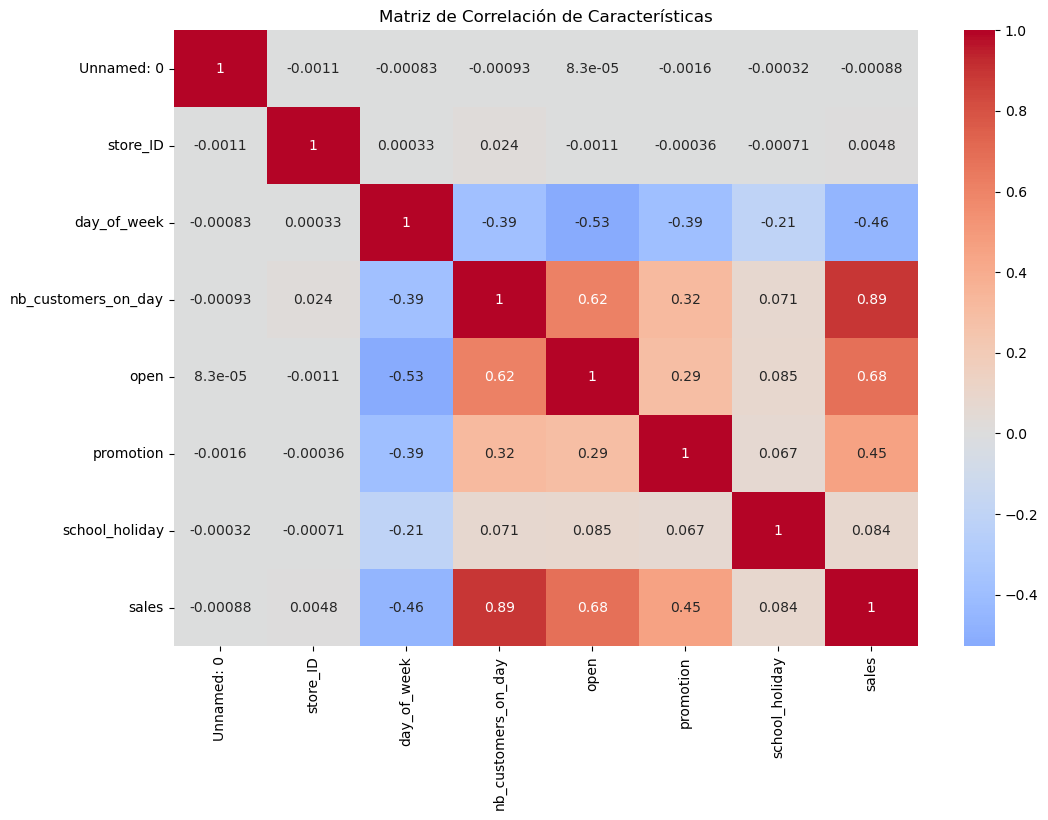

Número de valores faltantes por columna:
Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

Porcentaje de valores faltantes por columna:
Unnamed: 0             0.0
store_ID               0.0
day_of_week            0.0
date                   0.0
nb_customers_on_day    0.0
open                   0.0
promotion              0.0
state_holiday          0.0
school_holiday         0.0
sales                  0.0
dtype: float64

Resultados del modelo:
R2 Score: 0.820632573927038
MSE: 38607.90992568962


LinAlgError: SVD did not converge in Linear Least Squares

In [1]:
# Import your libraries:
%matplotlib inline

import numpy as np
import pandas as pd

salesDF = pd.read_csv('../data/sales.csv')
salesDF

# Challenge 1 - Explorar el Dataset

# Examinar la vista general de los datos
print("Vista general del dataset:")
print(salesDF.describe())

# Examinar los tipos de datos
print("\nTipos de datos:")
print(salesDF.info())

# Challenge 2 - Analizar Correlaciones

import seaborn as sns
import matplotlib.pyplot as plt

# Crear matriz de correlación usando columnas numéricas
correlation_matrix = salesDF.select_dtypes(include=['int64', 'float64']).corr()

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

# Challenge 3 - Manejar Valores Faltantes

# Examinar valores faltantes
print("Número de valores faltantes por columna:")
print(salesDF.isnull().sum())

# Calcular porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes por columna:")
print((salesDF.isnull().sum() / len(salesDF)) * 100)

# Eliminar columnas con más del 50% de valores faltantes
missing_percentages = (salesDF.isnull().sum() / len(salesDF)) * 100
columns_to_drop = missing_percentages[missing_percentages > 50].index
sales_cleaned = salesDF.drop(columns=columns_to_drop)

# Eliminar filas con valores faltantes
sales_cleaned = sales_cleaned.dropna()

# Challenge 4 - Preparar Variables Categóricas

# Convertir variables categóricas a dummies
sales_dummy = pd.get_dummies(sales_cleaned, drop_first=True)

# Challenge 5 - Modelado y Predicción 
# (asumiendo que queremos predecir 'nb_customers_on_day')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar variables
X = sales_dummy.drop('nb_customers_on_day', axis=1)
y = sales_dummy['nb_customers_on_day']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
print("\nResultados del modelo:")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
'''
# Challenge 6 - Feature Scaling

from sklearn.preprocessing import RobustScaler

# Aplicar scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar nuevo modelo con datos escalados
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Evaluar modelo con scaling
y_pred_scaled = model_scaled.predict(X_test_scaled)
print("\nResultados con Feature Scaling:")
print(f"R2 Score con scaling: {r2_score(y_test, y_pred_scaled)}")
print(f"MSE con scaling: {mean_squared_error(y_test, y_pred_scaled)}")
'''

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [ ]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [ ]:
# What the dataset looks like?
# The dataset looks like a table with 30 columns and 1781 rows.
# The first column is the URL of the website and the last column is the Type of the website.

print(websites.describe())

In [ ]:
# What are the data types?
# The data types are: 
# - URL: object
# - URL_LENGTH: int64
# - NUMBER_SPECIAL_CHARACTERS: int64
# - CHARSET: object
# - SERVER: object
# - CONTENT_LENGTH: int64
# - WHOIS_COUNTRY: object
# - WHOIS_STATEPRO: object
# - WHOIS_REGDATE: object
# - WHOIS_UPDATED_DATE: object
# - TCP_CONVERSATION_EXCHANGE: int64
# - DIST_REMOTE_TCP_PORT: int64
# - REMOTE_IPS: int64
# - APP_BYTES: int64
# - SOURCE_APP_PACKETS: int64
# - REMOTE_APP_PACKETS: int64
# - APP_PACKETS: int64
# - DNS_QUERY_TIMES: int64
# - TYPE: int64

print(websites.info())

In [ ]:
# Which columns contain the features of the websites?
# The columns that contain the features of the websites are:
# - URL
# - URL_LENGTH
# - NUMBER_SPECIAL_CHARACTERS
# - CHARSET
# - SERVER
# - CONTENT_LENGTH
# - WHOIS_COUNTRY
# - WHOIS_STATEPRO
# - WHOIS_REGDATE
# - WHOIS_UPDATED_DATE
# - TCP_CONVERSATION_EXCHANGE
# - DIST_REMOTE_TCP_PORT
# - REMOTE_IPS
# - APP_BYTES
# - SOURCE_APP_PACKETS
# - REMOTE_APP_PACKETS
# - APP_PACKETS
# - DNS_QUERY_TIMES

print(websites.info())

In [ ]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# The column Type contains the feature we will predict. 
print(websites['Type'].unique())



In [ ]:
# 0 for bening 1 for maliciuos websites
# Ver la distribución de valores
print(websites['Type'].value_counts())

In [ ]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Las columnas que necesitarán transformación son aquellas con tipo 'object':
# - URL
# - CHARSET
# - SERVER
# - WHOIS_COUNTRY
# - WHOIS_STATEPRO
# - WHOIS_REGDATE
# - WHOIS_UPDATED_DATE


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crear matriz de correlación usando solo columnas numéricas
correlation_matrix = websites.select_dtypes(include=['int64', 'float64']).corr()

# 2. CREATE HEATMAP
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

#3. Columns with high collinearity:
# - ASSIDE THE SAME COLUMN (IDENTITY MATRIX)
# - URL_LENGTH and NUMBER_SPECIAL_CHARACTERS
# - SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE
# - REMOTE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE
# - APP_PACKETS and TCP_CONVERSATION_EXCHANGE
# - DNS_QUERY_TIMES and TCP_CONVERSATION_EXCHANGE
# - REMOTE_APP_PACKETS and SOURCE_APP_PACKETS
# - REMOTE_APP_BYTES and APP_BYTES
# - APP_PACKETS and SOURCE_APP_PACKETS
# - APP_PACKETS and REMOTE_APP_PACKETS


### This is an example to know the feacture importance using a ML model

In [ ]:
#! pip install xgboost

In [ ]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [ ]:
import xgboost as xgb

# Define XGBRFClassifier model parameters
params = {
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bynode': 0.8,
    'max_depth': 3,
    'random_state': 42
}

# Instantiate XGBRFClassifier with the parameters
model = xgb.XGBRFClassifier(**params)
model.fit(X,y)

In [ ]:
sort_idx = model.feature_importances_.argsort()

In [ ]:
plt.barh(X.columns[sort_idx],model.feature_importances_[sort_idx])
plt.show();

    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [ ]:
#3. Columns with high collinearity ASSIDE THE SAME COLUMN (IDENTITY MATRIX)
# - URL_LENGTH and NUMBER_SPECIAL_CHARACTERS
# - SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE
# - REMOTE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE
# - DNS_QUERY_TIMES and TCP_CONVERSATION_EXCHANGE
# - REMOTE_APP_PACKETS and SOURCE_APP_PACKETS
# - REMOTE_APP_BYTES and APP_BYTES
# - APP_PACKETS and TCP_CONVERSATION_EXCHANGE
# - APP_PACKETS and SOURCE_APP_PACKETS
# - APP_PACKETS and REMOTE_APP_PACKETS

# IN CONCLUSION WE CAN EXPERIMENT WITH REMOVE THE FOLLOWING COLUMNS:
# - URL_LENGTH 
# - NUMBER_SPECIAL_CHARACTERS
# - SOURCE_APP_PACKETS
# - REMOTE_APP_PACKETS
# - APP_BYTES
# - TCP_CONVERSATION_EXCHANGE
# - DNS_QUERY_TIMES
# - REMOTE_APP_BYTES
# - APP_PACKETS

# I will try to remove the columns with more collinearity in this order:
# 1. APP_PACKETS
# 2. 


# Eliminemos 1 sola columna primero
# 1. Primero, eliminemos las columnas más correlacionadas
columns_to_drop_1 = ['APP_PACKETS']
websites_cleaned_1 = websites.drop(columns=columns_to_drop_1)

# 2. Verificar nuevamente la correlación después de eliminar estas columnas
correlation_matrix_new_1 = websites_cleaned_1.select_dtypes(include=['int64', 'float64']).corr()

# 3. Visualizar el nuevo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_new_1, annot=True, cmap='coolwarm', center=0)
plt.title('Nueva Matriz de Correlación 1')
plt.show()



# Eliminemos 2 columnas
# 1. Primero, eliminemos las columnas más correlacionadas
columns_to_drop_2 = ['APP_PACKETS','TCP_CONVERSATION_EXCHANGE']
websites_cleaned_2 = websites.drop(columns=columns_to_drop_2)

# 2. Verificar nuevamente la correlación después de eliminar estas columnas
correlation_matrix_new_2 = websites_cleaned_2.select_dtypes(include=['int64', 'float64']).corr()

# 3. Visualizar el nuevo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_new_2, annot=True, cmap='coolwarm', center=0)
plt.title('Nueva Matriz de Correlación 2')
plt.show()

# Eliminemos 3 columnas
# 1. Primero, eliminemos las columnas más correlacionadas
columns_to_drop_3 = ['APP_PACKETS','TCP_CONVERSATION_EXCHANGE','REMOTE_APP_PACKETS']
websites_cleaned_3 = websites.drop(columns=columns_to_drop_3)

# 2. Verificar nuevamente la correlación después de eliminar estas columnas
correlation_matrix_new_3 = websites_cleaned_3.select_dtypes(include=['int64', 'float64']).corr()

# 3. Visualizar el nuevo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_new_3, annot=True, cmap='coolwarm', center=0)
plt.title('Nueva Matriz de Correlación 3')
plt.show()

In [ ]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
# Eliminemos 4 columnas
# 1. Primero, eliminemos las columnas más correlacionadas
columns_to_drop_4 = ['APP_PACKETS','TCP_CONVERSATION_EXCHANGE','REMOTE_APP_PACKETS','REMOTE_APP_BYTES']
websites_cleaned_4 = websites.drop(columns=columns_to_drop_4)

# 2. Verificar nuevamente la correlación después de eliminar estas columnas
correlation_matrix_new_4 = websites_cleaned_4.select_dtypes(include=['int64', 'float64']).corr()

# 3. Visualizar el nuevo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_new_4, annot=True, cmap='coolwarm', center=0)
plt.title('Nueva Matriz de Correlación 4')
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [ ]:
# Examinar valores faltantes en cada columna
print("Número de valores faltantes por columna:")
print(websites_cleaned_4.isnull().sum())

# Calcular el porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes por columna:")
print((websites_cleaned_4.isnull().sum() / len(websites_cleaned_4)) * 100)

In [ ]:
# First we will drop the columns with more than 50% of missing data
# Identificamos las columnas con más del 50% de valores faltantes
missing_percentages = (websites_cleaned_4.isnull().sum() / len(websites_cleaned_4)) * 100
columns_to_drop = missing_percentages[missing_percentages > 50].index

# Eliminamos estas columnas
websites_cleaned_5 = websites_cleaned_4.drop(columns=columns_to_drop)

In [ ]:
# Now we will drop the rows with missing data
websites_cleaned_6 = websites_cleaned_5.dropna()

#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [ ]:
# Examine missing values in each column
print("Verificación final de valores faltantes:")
print(websites_cleaned_6.isnull().sum())


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [ ]:
websites_cleaned_6.WHOIS_COUNTRY.value_counts()

In [ ]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites_cleaned_6.WHOIS_COUNTRY = websites_cleaned_6.WHOIS_COUNTRY.apply(lambda x: good_country.get(x, x))

In [ ]:
websites_cleaned_6.WHOIS_COUNTRY.unique()

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [ ]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

In [ ]:
print_bar_plot(websites_cleaned_6.WHOIS_COUNTRY.unique(),websites_cleaned_6.WHOIS_COUNTRY.value_counts());

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [ ]:
# 1. Ver los valores únicos y su frecuencia
print("Top 10 países más frecuentes:")
print(websites_cleaned_6.WHOIS_COUNTRY.value_counts().head(10))

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [ ]:
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_cleaned_wo_columns = websites_cleaned_6.drop(columns=columns_to_drop)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [ ]:
# Your code here
websites_cleaned_wo_columns.dtypes


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [ ]:
websites_cleaned_wo_url = websites_cleaned_wo_columns.drop('URL', axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [ ]:
print("Valores únicos en CHARSET:")
websites_cleaned_wo_url.CHARSET.value_counts()

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [ ]:
# Ver valores únicos de SERVER
print("Valores únicos en SERVER:")
websites_cleaned_wo_url.SERVER.value_counts()


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
# Consolidar valores de SERVER
def categorize_server(server):
    if pd.isna(server):
        return 'Other'
    server = str(server).lower()
    if 'microsoft' in server:
        return 'Microsoft'
    elif 'apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Aplicar la categorización
websites_cleaned_wo_url['SERVER'] = websites_cleaned_wo_url['SERVER'].apply(categorize_server)

# Verificar los valores únicos de SERVER
print("Valores únicos en SERVER después de la categorización:")
print(websites_cleaned_wo_url['SERVER'].value_counts())

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [ ]:
# Convertir todas las variables categóricas a dummy
website_dummy = pd.get_dummies(websites_cleaned_wo_url, drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [ ]:
# Verificar que no quedan variables categóricas
print("\nTipos de datos después de la conversión:")
website_dummy.dtypes

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [ ]:
from sklearn.model_selection import train_test_split

# Separar los datos en train (80%) y test (20%)
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
log_reg = LogisticRegression(random_state=42)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Hacer predicciones
y_pred = log_reg.predict(X_test)

# Imprimir matriz de confusión y accuracy
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:
    The model is working fine but it have many errors in Type 2, it says that the model predict a non malicious web like a malicious web


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_3.fit(X_train, y_train)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [ ]:
y_pred_dt3 = dt_3.predict(X_test)
print("\nÁrbol de decisión (profundidad=3):")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt3))
print("Precisión:", accuracy_score(y_test, y_pred_dt3))

#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
dt_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_5.fit(X_train, y_train)

y_pred_dt5 = dt_5.predict(X_test)
print("\nÁrbol de decisión (profundidad=5):")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt5))
print("Precisión:", accuracy_score(y_test, y_pred_dt5))

Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

### Your conclusions here:

The accuracy score is the same stayed the same 

<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# 1. Aplicar RobustScaler a los datos de entrenamiento y prueba
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entrenar un nuevo modelo de regresión logística con los datos escalados
log_reg_scaled = LogisticRegression(random_state=42)
log_reg_scaled.fit(X_train_scaled, y_train)

# 3. Hacer predicciones con los datos escalados
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

# 4. Evaluar el modelo con datos escalados
print("Resultados con Feature Scaling:")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_scaled))
print("\nPrecisión del modelo con scaling:")
print(accuracy_score(y_test, y_pred_scaled))

# 5. Comparar con los resultados anteriores
print("\nComparación de precisión:")
print("Precisión sin scaling:", accuracy_score(y_test, y_pred))
print("Precisión con scaling:", accuracy_score(y_test, y_pred_scaled))

## Comments:

Add your comments here:
The accuracy decreased with scaling so this means that the original data worked better. In this case the scaling is not useful.
